<a href="https://colab.research.google.com/github/addalasaikishore/saikishore_info5731_2021/blob/main/In_class_exercise_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The eighth in-class-exercise (20 points in total, 3/30/2021)**

The data for this exercise is from the dataset you created from assignment three. Please perform answer the following questions based on your data:

#**Installing Required Libraries**

In [1]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor

     |████████████████████████████████| 133kB 8.0MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52557 sha256=dd0c1a07bcec60e587339f7ddf6480f417ca42d36b0b158a26235b02e8907317
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot
     |████████████████████████████████| 235kB 9.5MB/s 
  Created wheel for pyicu: filename=PyICU-2.6-cp37-cp37m-linux_x86_64.whl size=1306395 sha256=e4297f693be158f936a1ba732c2ecb06d98cc4ad3cde1bcfb392a4c2ce87e59e
  Stored in directory: /root/.cache/pip/wheels/31/21/2f/1c91831e8a93537ab21f6b4b935781b681104635fdb0315791
Successfully built pyicu
     |████████████████████████████████| 41.4MB 104kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834211 sha256=8127296a1b4ca2f4e0259ca1a2de7243f63e934ac0ac9c469e5c62adb6d95294
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3d

In [2]:
%%bash
polyglot download sentiment2.en

[polyglot_data] Downloading package sentiment2.en to
[polyglot_data]     /root/polyglot_data...


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## (1) (10 points) Write a python program to extract the sentiment related terms from the corpus. You may use python package such as polyglot or external lexicon resources in the question. Rank the sentiment related terms by frequency.

#**Reading Data**

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/addalasaikishore/saikishore_info5731_2021/main/reviwes.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#**Basic Preprocessing**

In [5]:
from nltk.corpus import stopwords
from textblob import TextBlob
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review'] = df['Review'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'] = df['Review'].apply(lambda x: str(TextBlob(x).correct()))

**Extracting Words Related to Sentiment using Polyglot**

In [8]:
from polyglot.text import Text
sentimental_words = []
for i in df['Review']:
  text = Text(line)
  for w in text.words:
    if w.polarity != 0:
      sentimental_words.append(w)
sentimental_words

['joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',
 'pleasantly',
 'well',
 'superb',
 'anguish',
 'right',
 'lost',
 'excellent',
 'well',
 'joke',
 'realistic',
 'joke',


#**Ranking Sentiment Words By Frequency**

In [9]:
from collections import Counter
frequencies = Counter(sentimental_words)
Rank_df = pd.DataFrame(list(frequencies.most_common()), columns=['Words', 'Frequencies'])
Rank_df.index = list(range(1, len(frequencies.most_common())+1))
Rank_df

,Words,Frequencies
1,joke,216
2,well,216
3,realistic,108
4,pleasantly,108
5,superb,108
6,anguish,108
7,right,108
8,lost,108
9,excellent,108


## (2) (10 points) Compare the performance of the following tools in sentiment identification: TextBlob (https://textblob.readthedocs.io/en/dev/), VADER (https://github.com/cjhutto/vaderSentiment), TFIDF-based Support Vector Machine (SVM) (Split your data into training and testing data). Take your own annotation as the standard answers. 

Reference code: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [19]:
def Encoder(senti):
  sentiment_encoded = 0
  if senti == 'Positive':
    sentiment_encoded = 1
  elif senti == 'Negative':
    sentiment_encoded = 2
  return sentiment_encoded

In [20]:
Actual_sentiment = []
for senti in df['Sentimental Analysis']:
  Actual_sentiment.append(Encoder(senti))

#**Sentimental Analysis usig Text Blob**

In [21]:
from textblob import TextBlob
textblob_sentiments = []
for i in df['Review']:
  polarity = TextBlob(line).sentiment.polarity
  if polarity > 0:
    textblob_sentiments.append(1)
  elif polarity < 0:
    textblob_sentiments.append(2)
  elif polarity == 0.0:
    textblob_sentiments.append(0)
text_blob_df = pd.DataFrame(list(zip(df['Review'], actual_sentiment, textblob_sentiments)), columns = ['Reviews', 'Actual', 'Predicted'])
text_blob_df

,Reviews,Actual,Predicted
0,every movie comes truly makes impact joaquins ...,1,1
1,movie felt alone isolated truly relate underst...,1,1
2,truly masterpiece best hollywood film 2019 one...,1,1
3,joaquin phoenix gives tour de force performanc...,0,1
4,time moves anticipated like end falling short ...,0,1
...,...,...,...
103,truly masterpiece best hollywood film 2019 one...,1,1
104,acting cinematography sound design script phen...,1,1
105,plan watching would suggest shipping last 20 3...,0,1
106,want title make wouldn know based comicbook ch...,1,1


In [22]:
from sklearn.metrics import f1_score, accuracy_score
text_blob_accuracy = accuracy_score(text_blob_df['Actual'], text_blob_df['Predicted'])*100
text_blob_f1_score = f1_score(text_blob_df['Actual'], text_blob_df['Predicted'], average = 'macro')
print("Text Blob Accuracy is {0} and F1 Score is {1}".format(text_blob_accuracy, text_blob_f1_score))

Text Blob Accuracy is 56.481481481481474 and F1 Score is 0.36094674556213013


#**Sentimental Analysis using Vader**

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader_sentiments = []
for line in df['Review']:
  polarity = vader.polarity_scores(line)['compound']
  if polarity > 0:
    vader_sentiments.append(1)
  elif polarity < 0:
    vader_sentiments.append(2)
  elif polarity == 0.0:
    vader_sentiments.append(0)
vader_df = pd.DataFrame(list(zip(df['Review'], actual_sentiment, vader_sentiments)), columns = ['Reviews', 'Actual', 'Predicted'])
vader_df

,Reviews,Actual,Predicted
0,every movie comes truly makes impact joaquins ...,1,1
1,movie felt alone isolated truly relate underst...,1,1
2,truly masterpiece best hollywood film 2019 one...,1,1
3,joaquin phoenix gives tour de force performanc...,0,1
4,time moves anticipated like end falling short ...,0,1
...,...,...,...
103,truly masterpiece best hollywood film 2019 one...,1,1
104,acting cinematography sound design script phen...,1,1
105,plan watching would suggest shipping last 20 3...,0,1
106,want title make wouldn know based comicbook ch...,1,2


In [26]:
from sklearn.metrics import f1_score, accuracy_score
vader_accuracy = accuracy_score(vader_df['Actual'], vader_df['Predicted'])*100
vader_f1_score = f1_score(vader_df['Actual'], vader_df['Predicted'], average = 'macro')
print("Vader Accuracy is {0} and F1 Score is {1}".format(vader_accuracy, vader_f1_score))

Vader Accuracy is 49.074074074074076 and F1 Score is 0.23399558498896247


**Sentimenatl Analysis using SVM**

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
TFid_vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [29]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(df['Review'],df['Sentimental Analysis'],test_size=0.33)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Train_X_vectors = TFid_vectorizer.fit_transform(Train_X)
Test_X_vectors = TFid_vectorizer.transform(Test_X)

In [30]:
from sklearn import svm
from sklearn.metrics import classification_report
svm_model = svm.SVC(kernel='linear')
svm_model.fit(Train_X_vectors, Train_Y)
predicted = svm_model.predict(Test_X_vectors)
report = classification_report(Test_Y, predicted, output_dict=True)
report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.5333333333333333,
  'precision': 0.8,
  'recall': 0.4,
  'support': 10},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 3},
 '2': {'f1-score': 0.8148148148148149,
  'precision': 0.7096774193548387,
  'recall': 0.9565217391304348,
  'support': 23},
 'accuracy': 0.7222222222222222,
 'macro avg': {'f1-score': 0.4493827160493827,
  'precision': 0.503225806451613,
  'recall': 0.4521739130434783,
  'support': 36},
 'weighted avg': {'f1-score': 0.668724279835391,
  'precision': 0.6756272401433692,
  'recall': 0.7222222222222222,
  'support': 36}}

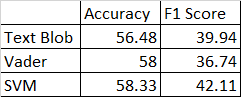
